In [1]:
from sklearn.datasets import fetch_openml
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
mnist = fetch_openml('mnist_784', as_frame=False)
X, y = torch.from_numpy(mnist.data.astype('float32')).to(device) / 255, torch.from_numpy(mnist.target.astype('int')).to(device)

In [2]:
split = int(len(X) * 6 / 7)

test_X = X[split:]
test_y = y[split:]
train_X = X[:split]
train_y = y[:split]

train_X.shape, train_y.shape

(torch.Size([60000, 784]), torch.Size([60000]))

In [3]:
import torch.nn as nn, torch.nn.functional as F

class MulticlassMLP(nn.Module):
    def __init__(self, in_dim=784, hidden_dim=128, out_dim=10):
        super().__init__()
        self.W1 = nn.Parameter(torch.randn(in_dim, hidden_dim, device=device))
        self.B1 = nn.Parameter(torch.randn(hidden_dim, device=device))
        self.W2 = nn.Parameter(torch.randn(hidden_dim, out_dim, device=device))
        self.B2 = nn.Parameter(torch.randn(out_dim, device=device))
    
    def forward(self, X):
        X2 = X @ self.W1 + self.B1
        X3 = F.relu(X2)
        X4 = X3 @ self.W2 + self.B2
        return X4

model = MulticlassMLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [4]:
model.train()
epoch = 10000
train_error, test_error = [], []

for i in range(epoch):
    train_loss = criterion(model(train_X), train_y)
    test_loss = criterion(model(test_X), test_y)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    train_error.append(train_loss.item())
    test_error.append(test_loss.item())

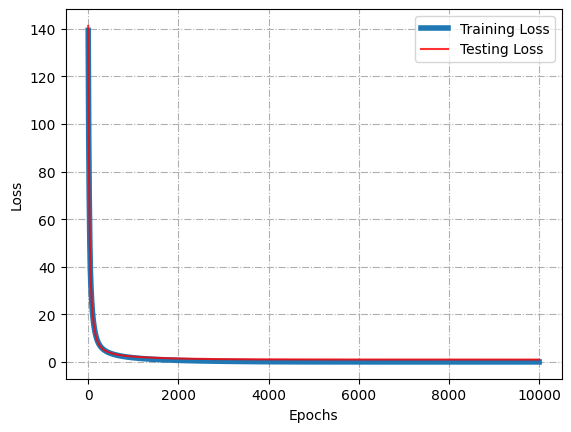

In [7]:
import matplotlib.pyplot as plt

linspace = torch.linspace(0, epoch - 1, epoch)
plt.plot(linspace, train_error, linewidth=4, label='Training Loss')
plt.plot(linspace, test_error, color='red', alpha=0.8, label='Testing Loss')
plt.grid(linestyle='-.')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [9]:
torch.save(model.state_dict(), '../inference/param/MNIST_multiclass_MLP.pth')